In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import matplotlib as mpl
from datetime import datetime
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv", parse_dates=['Quarter'], date_parser=parse )

In [5]:
df.head()

Quarter  Revenue  Net Income
0 2020-03-31    75452        2535
1 2019-12-31    87437        3268
2 2019-09-30    69981        2134
3 2019-06-30    63404        2625
4 2019-03-31    59700        3561

In [6]:
print("Rows: ", df.shape[0])
print('Columns: ', df.shape[1])
print('\nFeatures: ', df.columns.tolist())
print('\nMissing Values: ', df.isnull().sum())
print('\nUnique Values: ', df.nunique())

Rows:  61
Columns:  3

Features:  ['Quarter', 'Revenue', 'Net Income']

Missing Values:  Quarter       0
Revenue       0
Net Income    0
dtype: int64

Unique Values:  Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [8]:
amazon_df = df.set_index('Quarter')

In [9]:
amazon_df.head()

Revenue  Net Income
Quarter                        
2020-03-31    75452        2535
2019-12-31    87437        3268
2019-09-30    69981        2134
2019-06-30    63404        2625
2019-03-31    59700        3561

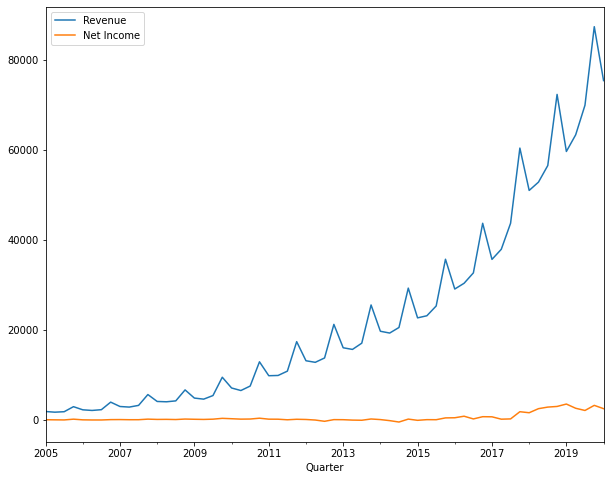

In [10]:
amazon_df.plot()

In [11]:
import plotly.express as px
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue with Slider')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1y', step='year', stepmode='backward'),
                      dict(count=2, label='3y', step='year', stepmode='backward'),
                      dict(count=3, label='5y', step='year', stepmode='backward'),
                      dict(step='all')
        ])
    )
)
fig.show()

In [12]:
from statsmodels.tsa.stattools import kpss

In [13]:
tstest = kpss(amazon_df['Revenue'], 'ct')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [14]:
# Null Hypothesis is rejected ie the data is not stationary
tstest

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Additive: $y_{t} = T_{t} + C_{t} + S_{t} + I_{t}$
Multiplicative: $y_{t} = T_{t} * C_{t} * S_{t} * I_{t}$


In [15]:
# If stationary we use additive model
# If not stationary we use multiplicative model

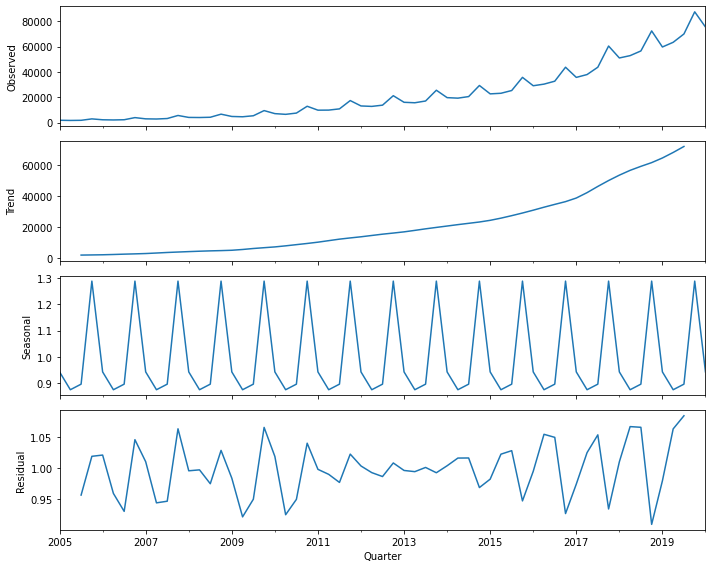

In [16]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'],
                                model='multiplicative')
resplot = res.plot()

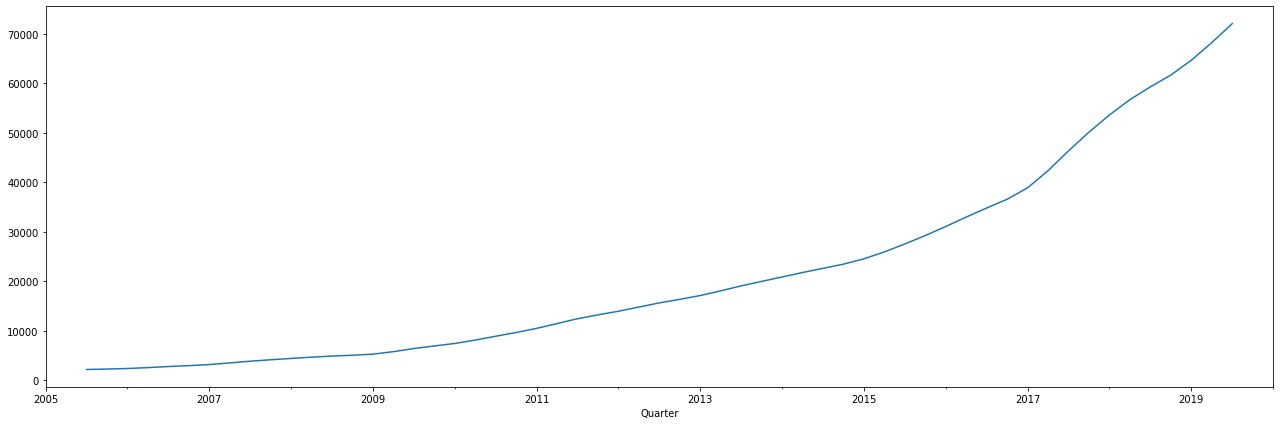

In [17]:
plt.figure(figsize=(22, 7))
res.trend.plot()

In [18]:
res.observed

Quarter
2020-03-31    75452
2019-12-31    87437
2019-09-30    69981
2019-06-30    63404
2019-03-31    59700
              ...  
2006-03-31     2279
2005-12-31     2977
2005-09-30     1858
2005-06-30     1753
2005-03-31     1902
Name: Revenue, Length: 61, dtype: int64

In [19]:
print(res.trend)

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: Revenue, Length: 61, dtype: float64


In [20]:
print(res.seasonal)

Quarter
2020-03-31    0.941840
2019-12-31    1.289518
2019-09-30    0.894993
2019-06-30    0.873649
2019-03-31    0.941840
                ...   
2006-03-31    0.941840
2005-12-31    1.289518
2005-09-30    0.894993
2005-06-30    0.873649
2005-03-31    0.941840
Name: Revenue, Length: 61, dtype: float64


In [24]:
res.resid

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: Revenue, Length: 61, dtype: float64

In [25]:
res.observed[2]

69981

In [26]:
# Hence, Proved
res.trend[2]*res.seasonal[2]*res.resid[2]

69980.99999999999

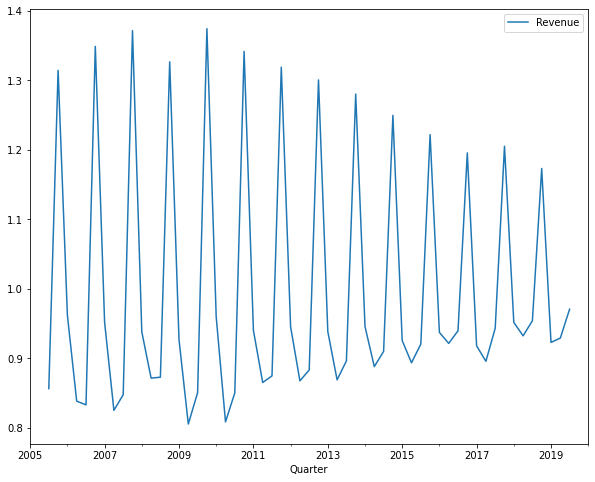

In [27]:
pd.DataFrame(res.observed/res.trend).plot()